# Discriptive Statistics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\naman\Downloads\jupyter notebook\us-accidents\US_Accidents_March23.csv")
data.drop(['Start_Lat', 'End_Lat'],axis=1,inplace=True)

In [3]:
# changing datatype of the column End_Time to extract day,month,year and other details

data['End_Time'] = data['End_Time'].str.replace(r'\.\d+', '', regex=True)
data['End_Time'] = pd.to_datetime(data['End_Time'], format="%Y-%m-%d %H:%M:%S")
data["Year"]=data["End_Time"].dt.year
data['Month']=data['End_Time'].dt.month
data['Day']= data['End_Time'].dt.day
data['Hour']=data['End_Time'].dt.hour
data['Minute']=data['End_Time'].dt.minute
data['Second']=data['End_Time'].dt.second

In [4]:
numerical_data=data.select_dtypes(include=[int,float]).columns.tolist()
numerical_data

['Severity',
 'Start_Lng',
 'End_Lng',
 'Distance(mi)',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Year',
 'Month',
 'Day',
 'Hour',
 'Minute',
 'Second']

## Measure of Central Tendency

In [5]:
# Mean of Columns

means=data[numerical_data].mean()
print(means)

Severity                2.212384
Start_Lng             -94.702545
End_Lng               -95.725570
Distance(mi)            0.561842
Temperature(F)         61.663286
Wind_Chill(F)          58.251048
Humidity(%)            64.831041
Pressure(in)           29.538986
Visibility(mi)          9.090376
Wind_Speed(mph)         7.685490
Precipitation(in)       0.008407
Year                 2019.909011
Month                   6.704709
Day                    15.750328
Hour                   13.034765
Minute                 29.389712
Second                 27.012817
dtype: float64


In [6]:
# Mean of Columns

modes=data[numerical_data].mode()
print(modes)

   Severity   Start_Lng    End_Lng  Distance(mi)  Temperature(F)  \
0         2 -122.366852 -81.471375           0.0            77.0   

   Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
0           73.0         93.0         29.96            10.0              0.0   

   Precipitation(in)  Year  Month  Day  Hour  Minute  Second  
0                0.0  2022     12   23    18      45       0  


In [7]:
# Median of Columns

# Automatically perform necessary sorting. Don't need to sort manually...
medians=data[numerical_data].median()
print(medians)

Severity                2.000000
Start_Lng             -87.766616
End_Lng               -88.027890
Distance(mi)            0.030000
Temperature(F)         64.000000
Wind_Chill(F)          62.000000
Humidity(%)            67.000000
Pressure(in)           29.860000
Visibility(mi)         10.000000
Wind_Speed(mph)         7.000000
Precipitation(in)       0.000000
Year                 2020.000000
Month                   7.000000
Day                    16.000000
Hour                   14.000000
Minute                 29.000000
Second                 28.000000
dtype: float64


## Measure of Variability/Dispersion

In [8]:
# Range
# It does not handle null values automatically. So, either fill null values or drop null values first...

null_val_data=data[numerical_data]
not_null_val_data=null_val_data[null_val_data.notnull().all(axis=1)]
columns=not_null_val_data.columns
for i in columns:
    ran=np.ptp(not_null_val_data[i])
    print("peak to peak range of " ,i , "is " , f"\033[1m{ran}\033[0m")
    




peak to peak range of  Severity is  3
peak to peak range of  Start_Lng is  57.06394399999999
peak to peak range of  End_Lng is  57.061617999999996
peak to peak range of  Distance(mi) is  155.186
peak to peak range of  Temperature(F) is  241.0
peak to peak range of  Wind_Chill(F) is  259.0
peak to peak range of  Humidity(%) is  99.0
peak to peak range of  Pressure(in) is  58.63
peak to peak range of  Visibility(mi) is  100.0
peak to peak range of  Wind_Speed(mph) is  1087.0
peak to peak range of  Precipitation(in) is  24.0
peak to peak range of  Year is  7
peak to peak range of  Month is  11
peak to peak range of  Day is  30
peak to peak range of  Hour is  23
peak to peak range of  Minute is  59
peak to peak range of  Second is  59


In [9]:
# Variance

var_cols = data[numerical_data]
columns=var_cols.columns
for i in columns:
    variance=np.var(var_cols[i])
    print("variance of ",i," is " , f"\033[1m{variance}\033[0m")

variance of  Severity  is  0.23768677087029105
variance of  Start_Lng  is  302.47314643793436
variance of  End_Lng  is  327.89696747802066
variance of  Distance(mi)  is  3.1570555111005127
variance of  Temperature(F)  is  361.518963682846
variance of  Wind_Chill(F)  is  501.30447827850946
variance of  Humidity(%)  is  520.796496000138
variance of  Pressure(in)  is  1.012417798597096
variance of  Visibility(mi)  is  7.227041535853259
variance of  Wind_Speed(mph)  is  29.43044118223315
variance of  Precipitation(in)  is  0.012149471016963967
variance of  Year  is  3.668286682797399
variance of  Month  is  13.262134313427445
variance of  Day  is  75.45624243541369
variance of  Hour  is  33.906176686413666
variance of  Minute  is  299.30521646579774
variance of  Second  is  328.6695675055653


In [10]:
# Standard Deviation

std_cols = data[numerical_data]
columns=std_cols.columns
for i in columns:
    st_d=np.std(std_cols[i])
    print("Standard deviation of ",i," is " , f"\033[1m{st_d}\033[0m")

Standard deviation of  Severity  is  0.4875313024517411
Standard deviation of  Start_Lng  is  17.391755128161574
Standard deviation of  End_Lng  is  18.107925543198498
Standard deviation of  Distance(mi)  is  1.7768104882346099
Standard deviation of  Temperature(F)  is  19.01365203433696
Standard deviation of  Wind_Chill(F)  is  22.389829795657434
Standard deviation of  Humidity(%)  is  22.82096614957697
Standard deviation of  Pressure(in)  is  1.0061897428403332
Standard deviation of  Visibility(mi)  is  2.688315743333223
Standard deviation of  Wind_Speed(mph)  is  5.424983058243883
Standard deviation of  Precipitation(in)  is  0.11022463888334572
Standard deviation of  Year  is  1.915277181714803
Standard deviation of  Month  is  3.6417213393431744
Standard deviation of  Day  is  8.686555268655907
Standard deviation of  Hour  is  5.822901054149355
Standard deviation of  Minute  is  17.30043977665879
Standard deviation of  Second  is  18.129246192425246


## Measure of Association 

In [41]:
# Correlation

dd=data[numerical_data]
corr_matrix=dd.corr()
print(corr_matrix)

                   Severity  Start_Lng   End_Lng  Distance(mi)  \
Severity           1.000000   0.052862  0.093190      0.034787   
Start_Lng          0.052862   1.000000  0.999999      0.007851   
End_Lng            0.093190   0.999999  1.000000      0.005876   
Distance(mi)       0.034787   0.007851  0.005876      1.000000   
Temperature(F)    -0.020327  -0.010652  0.024084     -0.054082   
Wind_Chill(F)     -0.070039  -0.031810  0.006733     -0.044309   
Humidity(%)        0.022293   0.179500  0.167428      0.008780   
Pressure(in)       0.042347   0.193185  0.216028     -0.093121   
Visibility(mi)    -0.003473  -0.015322  0.006155     -0.037225   
Wind_Speed(mph)    0.040214   0.077353  0.092303      0.008989   
Precipitation(in)  0.021080   0.027619  0.025536     -0.001480   
Year              -0.246998   0.035299  0.079114      0.137999   
Month             -0.010211   0.011430  0.011961      0.003886   
Day                0.000501  -0.001316 -0.000128      0.002567   
Hour      

In [69]:
# Frequency count...

jk=data[numerical_data]
ab=jk.columns
for i in ab:
    print(jk[i].value_counts())

Severity
2    6156981
3    1299337
4     204710
1      67366
Name: count, dtype: int64
Start_Lng
-122.366852    578
-118.096634    562
-82.260422     545
-84.390343     534
-83.111794     534
              ... 
-117.401230      1
-118.429120      1
-121.741635      1
-121.890724      1
-117.847790      1
Name: count, Length: 2482533, dtype: int64
End_Lng
-81.471375     1037
-80.334179      860
-80.416621      836
-81.477219      794
-80.416521      721
               ... 
-93.089541        1
-97.816728        1
-117.281500       1
-80.295654        1
-117.239340       1
Name: count, Length: 1605789, dtype: int64
Distance(mi)
0.000     3302161
0.010      262493
0.008       14558
0.009       13836
0.010       13367
           ...   
12.122          1
26.311          1
13.179          1
16.433          1
36.350          1
Name: count, Length: 22382, dtype: int64
Temperature(F)
 77.0     170991
 73.0     170898
 68.0     163767
 72.0     160498
 75.0     158448
           ...  
 1.6       

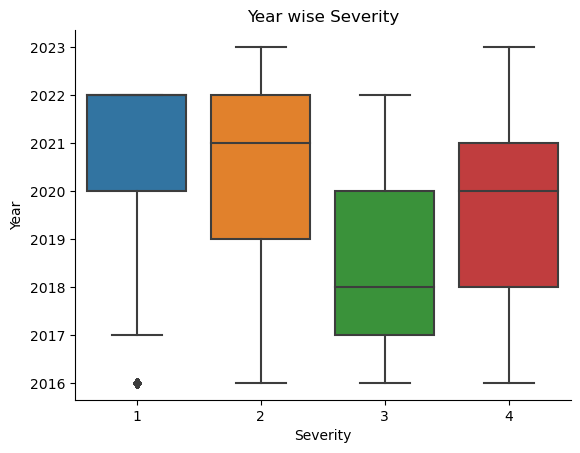

In [13]:
# Year wise severity...

sns.boxplot(x=data.Severity,y=data.Year)
sns.despine(right=True)
plt.title("Year wise Severity")
plt.show()

C:\Users\naman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


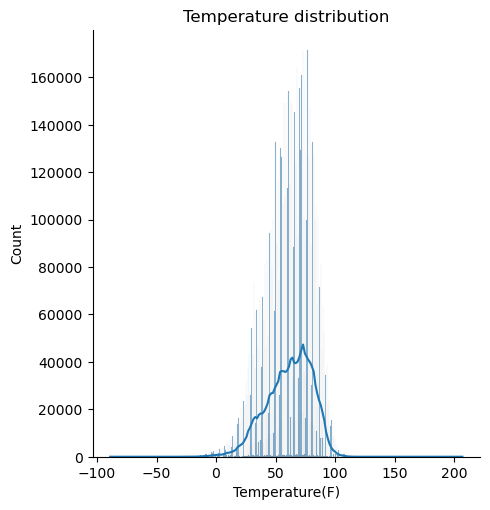

In [25]:
# Temperature distribution

sns.displot(data=data,x="Temperature(F)",kde=True)
plt.title("Temperature distribution")
plt.show()

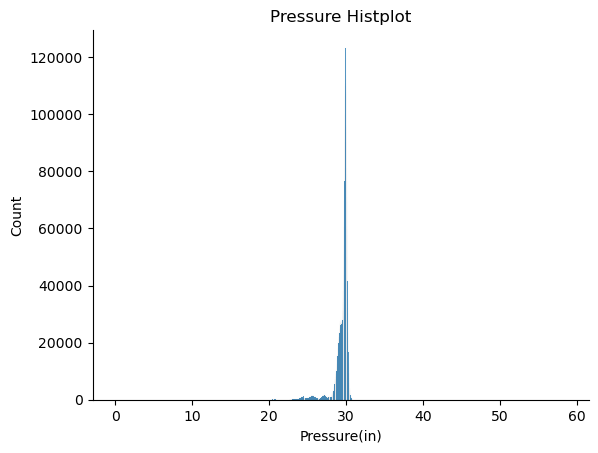

In [27]:
# Pressure distribution

sns.histplot(data=data,x="Pressure(in)")
sns.despine(right=True)
plt.title("Pressure Histplot")
plt.show()

In [3]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lng',
       'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')